In [80]:
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Now we need to read in the data
df_movies = pd.read_csv('/Users/adishsundar/Desktop/movies.csv')

In [117]:
df_movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


In [36]:
#Looking for missing data
for column in df_movies.columns:
    percent_missing = np.mean(df[column].isnull())
    print(f'{column} - {percent_missing}%')

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [81]:
#data types of columns
df_movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [118]:
df_movies.sort_values(by = ['gross'], inplace = False, ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0


In [41]:
pd.set_option('display.max_rows', None)

In [115]:
df_movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


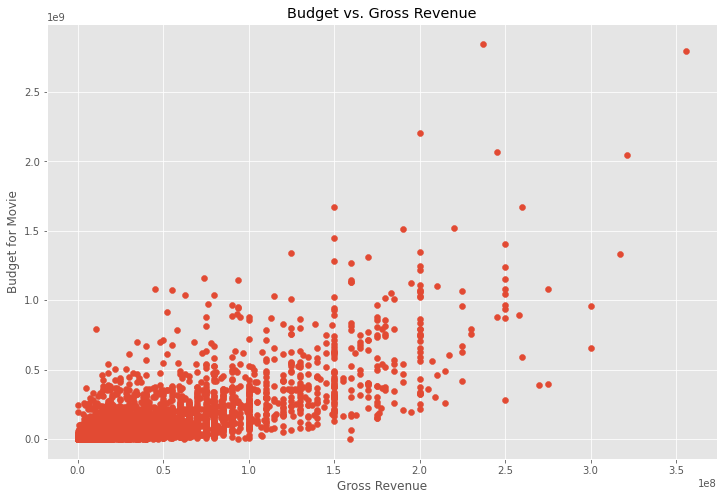

In [50]:
#Scatteplot budget vs. gross revenue

plt.scatter(x = df_movies['budget'], y = df_movies['gross'])

plt.title('Budget vs. Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Budget for Movie')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

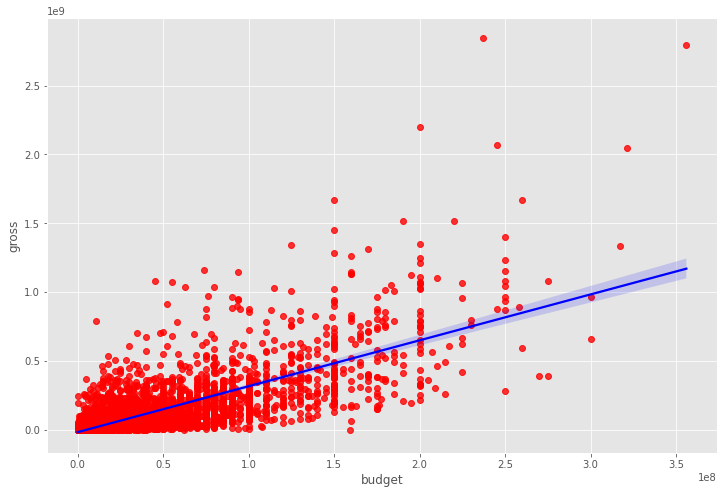

In [56]:
# Plot budget vs. gross revenue using seaborn

sb.regplot(x = 'budget', y = 'gross', data = df_movies, scatter_kws = {"color": "red"}, line_kws = {"color": "blue"})

In [ ]:
# Looking at coorelation

In [60]:
corr_matrix = df_movies.corr(method = 'pearson') #pearson, kendall, spearmen

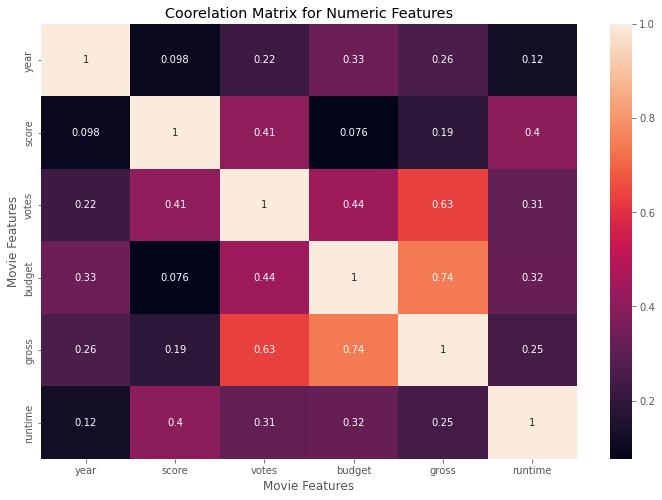

In [63]:
sb.heatmap(corr_matrix, annot = True)

plt.title('Coorelation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [82]:
df_movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [114]:
df_numerized = df_movies

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


In [98]:
# Looking at missing values
df_numerized.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          3
votes          3
director       0
writer         0
star           0
country        0
budget      2171
gross        189
company        0
runtime        4
dtype: int64

In [121]:
# Filling missing values with the mean of each column

df_fill = df_numerized.fillna(df_numerized.mean())
                             
df_fill.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


In [106]:
df_fill.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [108]:
# Change data type of columns

df_fill['budget'] = df_fill['budget'].astype('int64')

df_fill['gross'] = df_fill['gross'].astype('int64')

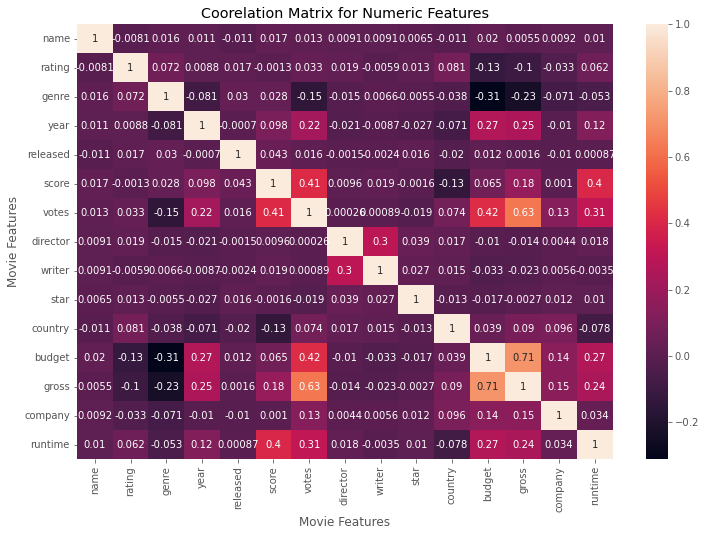

In [109]:
# Turning categorical features into numerical features to see the coorelation to gross revenue
corr_matrix = df_fill.corr(method = 'pearson') #pearson, kendall, spearmen

sb.heatmap(corr_matrix, annot = True)

plt.title('Coorelation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [110]:
df_fill.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017095,0.013086,0.009079,0.009081,0.006472,-0.010737,0.020368,0.005466,0.009211,0.010390
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001310,0.033127,0.019483,-0.005921,0.013405,0.081244,-0.126046,-0.102116,-0.032943,0.062051
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027959,-0.145276,-0.015258,0.006567,-0.005477,-0.037615,-0.310566,-0.230267,-0.071067,-0.052699
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097936,0.222810,-0.020795,-0.008656,-0.027242,-0.070938,0.265578,0.252042,-0.010431,0.120766
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042779,0.016094,-0.001478,-0.002404,0.015777,-0.020427,0.012263,0.001636,-0.010474,0.000867
score,0.017095,-0.001310,0.027959,0.097936,0.042779,1.000000,0.409182,0.009559,0.019410,-0.001609,-0.133343,0.064541,0.182868,0.001030,0.399329
votes,0.013086,0.033127,-0.145276,0.222810,0.016094,0.409182,1.000000,0.000260,0.000891,-0.019277,0.073622,0.421007,0.628713,0.133129,0.309166
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.010364,-0.014272,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019410,0.000891,0.299067,1.000000,0.027245,0.015343,-0.033216,-0.023210,0.005646,-0.003510
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019277,0.039234,0.027245,1.000000,-0.012998,-0.016628,-0.002682,0.012442,0.010171


In [120]:
coorelation_matrix = df_fill.corr()
corr_pairs = coorelation_matrix.unstack()

corr_pairs

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          released   -0.011311
          score       0.017095
          votes       0.013086
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.020368
          gross       0.005466
          company     0.009211
          runtime     0.010390
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.016613
          score      -0.001310
          votes       0.033127
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.126046
          gross      -0.102116
          company    -0.032943
          runtime     0.062051
genre     name        0.016355
          rating      0.072423
        

In [112]:
sorted_corr_pairs = corr_pairs.sort_values()
sorted_corr_pairs

budget    genre      -0.310566
genre     budget     -0.310566
gross     genre      -0.230267
genre     gross      -0.230267
votes     genre      -0.145276
genre     votes      -0.145276
score     country    -0.133343
country   score      -0.133343
rating    budget     -0.126046
budget    rating     -0.126046
gross     rating     -0.102116
rating    gross      -0.102116
year      genre      -0.081261
genre     year       -0.081261
country   runtime    -0.078297
runtime   country    -0.078297
company   genre      -0.071067
genre     company    -0.071067
country   year       -0.070938
year      country    -0.070938
runtime   genre      -0.052699
genre     runtime    -0.052699
          country    -0.037615
country   genre      -0.037615
writer    budget     -0.033216
budget    writer     -0.033216
company   rating     -0.032943
rating    company    -0.032943
star      year       -0.027242
year      star       -0.027242
gross     writer     -0.023210
writer    gross      -0.023210
director

In [113]:
high_corr = sorted_corr_pairs[(sorted_corr_pairs) > 0.5]
high_corr

gross     votes       0.628713
votes     gross       0.628713
budget    gross       0.711270
gross     budget      0.711270
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# Votes and Budget have the highest coorelation to Gross Revenue